### Download the GRE data set
<b>Download link:</b> https://www.kaggle.com/mohansacharya/graduate-admissions



In [4]:
import torch

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
data = pd.read_csv('datasets/graduate-admissions/admission_predict.csv')                         

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.shape

(400, 9)

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#### We change the name for chance of admit to Admit_probability

In [9]:
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})

data = data[['GRE Score', 'TOEFL Score', 
             'University Rating', 'SOP', 
             'LOR ', 'CGPA', 'Research', 
             'Admit_Probability']]

In [10]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Visualizing relationships

Understanding the relation between different factors responsible for admissions


Students with high GRE scores usually have a high TOEFL score.

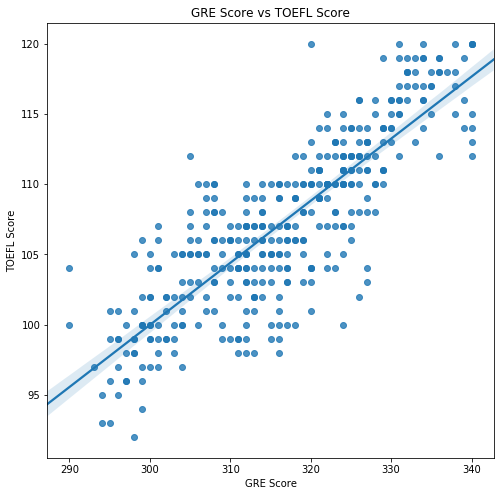

In [12]:
plt.figure(figsize=(8, 8))

fig = sns.regplot( x ="GRE Score", y = "TOEFL Score", data = data)
plt.title("GRE Score vs TOEFL Score")

plt.show()

Students with high GRE scores usually have a high CGPA score.

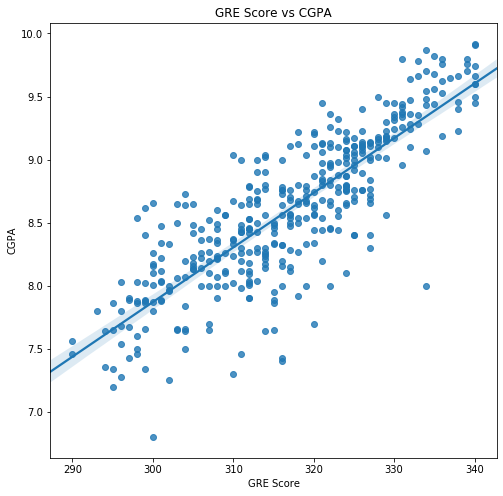

In [13]:
plt.figure(figsize=(8, 8))

fig = sns.regplot(x = 'GRE Score', y = 'CGPA', data = data)
plt.title("GRE Score vs CGPA")

plt.show()

#### Higher the CGPA higher is the admit probability, also if the candidate has a research experience there is a greater chance of being admitted

Text(0, 0.5, 'CGPA')

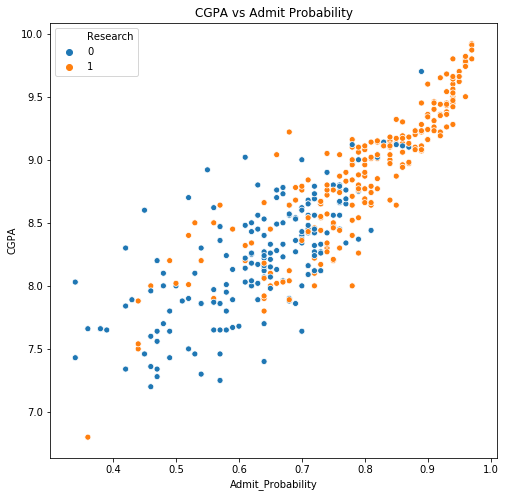

In [14]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x = 'Admit_Probability', y = 'CGPA', data = data, hue = 'Research')

plt.title("CGPA vs Admit Probability")

plt.xlabel('Admit_Probability')
plt.ylabel('CGPA')

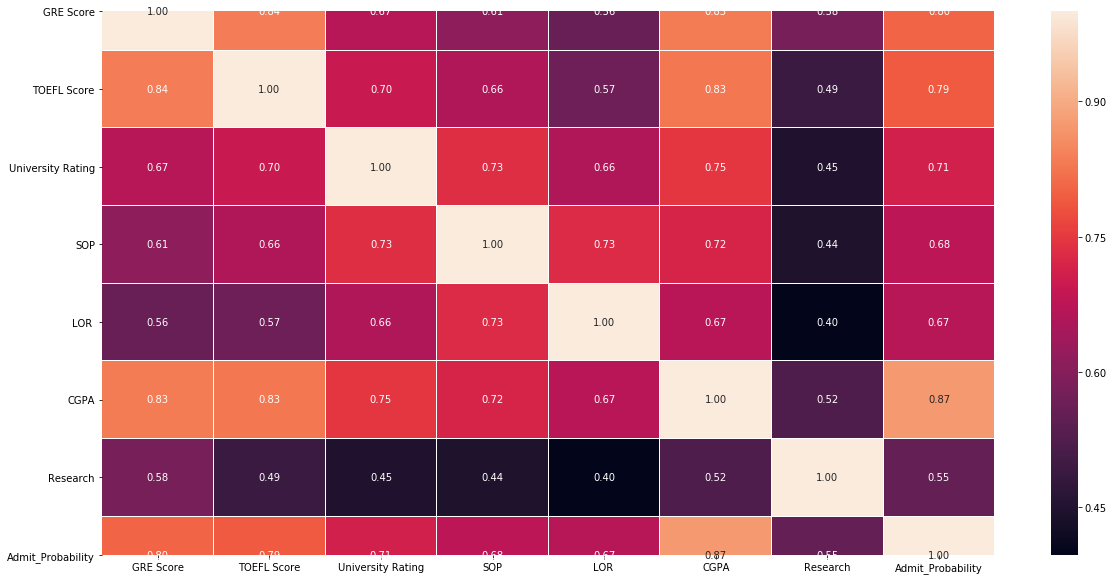

In [18]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f')

plt.show()

#### Scaling the continuous values

In [19]:
from sklearn import preprocessing

In [20]:
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA' ]] = \
                preprocessing.scale(data[['GRE Score', 'TOEFL Score','SOP', 'LOR ', 'CGPA']])

In [21]:
data.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
152,0.365860,0.757186,5,1.591075,1.724515,0.774173,1,0.86
142,1.238514,1.252078,5,0.596653,0.052933,1.412216,1,0.92
210,0.714922,0.097329,4,1.093864,0.610127,0.774173,1,0.79
181,-1.030386,-0.067635,2,-0.894980,-1.061454,-0.300426,0,0.71
373,0.365860,0.262293,3,-0.397769,-0.504260,-0.098939,1,0.79
220,-0.332263,-0.727492,3,0.596653,0.610127,0.253664,0,0.76
138,0.802187,1.417042,2,1.093864,-0.504260,0.807754,1,0.80
73,-0.244998,0.097329,4,1.093864,0.610127,0.740592,1,0.84
22,0.976718,1.417042,5,1.591075,1.724515,1.512959,1,0.94
287,0.627656,1.087114,5,1.591075,1.167321,0.807754,1,0.89


#### features that we will use to predict the dependent variable

In [22]:
col = ['GRE Score','TOEFL Score', 'SOP', 'LOR ', 'CGPA']

features = data[col]

In [23]:
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


#### The Admit_Probability is our target variable

In [24]:
target = data[['Admit_Probability']]

In [25]:
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


#### Now we will use the  dataset as a classification problem by classifying the admit probability  into 3 categories
- Admit_Probability >= .80 is categorised as <b>2</b>
- .80 > Admit_Probability >= .60 is categorised as <b>1</b>
- Admit_Probability <.60 is categorised as <b>0</b>

In [27]:
y = target.copy()

In [28]:
y.replace(to_replace = target[target >= 0.80], value= int(2), inplace=True)
y.replace(to_replace = target[target >= 0.60], value = int(1), inplace=True)
y.replace(to_replace = target[target < 0.60], value = int(0), inplace=True)

In [29]:
target = y

In [30]:
target['Admit_Probability'].unique()

array([2., 1., 0.])

In [31]:
target.head()

,Admit_Probability
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0


#### Create training and test data using train_test_split

In [32]:
from sklearn.model_selection import train_test_split

#### Split the data into two chunks - 80% for training and 20% for testing 
We can then check the accuracy of our model on the test data


In [33]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

#### Converting data in pytorch tensors

In [34]:
Xtrain = torch.from_numpy(X_train.values).float()

Xtest = torch.from_numpy(x_test.values).float()

In [35]:
Xtrain.shape

torch.Size([320, 5])

In [36]:
Y_train.shape, y_test.shape

In [37]:
y_test

,Admit_Probability
351,1.0
1,1.0
15,0.0
205,0.0
165,1.0
...,...
290,0.0
74,1.0
92,0.0
158,1.0


<b>view: </b>with view we reshape the tensor <br>
view with -1<br>
If there is any situation that you don't know how many columns you want but are sure of the number of rows then you can mention it as -1, or visa-versa (You can extend this to tensors with more dimensions. Only one of the axis value can be -1).

In [38]:
Ytrain = torch.from_numpy(Y_train.values).view(1, -1)[0].long()

Ytest = torch.from_numpy(y_test.values).view(1, -1)[0].long()

In [40]:
type(Ytrain), type(Ytest)

(torch.Tensor, torch.Tensor)

In [41]:
Ytrain.shape, Ytest.shape

(torch.Size([320]), torch.Size([80]))

#### Define the parameters for the neural network


In [42]:
import torch.nn as nn
import torch.nn.functional as F

#### input size matches the size of x
#### output size is  3 as there are 3 labels

In [89]:
input_size = Xtrain.shape[1]

output_size = len(target['Admit_Probability'].unique())

Define a neural network class from which to create our model
We create a class named Net which inherits nn.Module(Base class for all neural network modules.)

we want to train the neural network such that we pass in the hidden size,choose  our activation function and choose wether the model will have dropout layer or not


super : This is calling the __init__() method of the parent class(nn.Module)

fc1 to fc3 : Applies a linear transformation to the incoming data: y=Wx+b
Dropout : During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution.

Parameters :
in_features – size of each input sample
out_features – size of each output sample
bias – If set to False, the layer will not learn an additive bias. Default: True

Sigmoid : Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))
Tanh: Applies the element-wise function Tanh(x) = (e**x - e**-x)/(e**x + e**-x)
ReLu : Applies the rectified linear unit function element-wise ReLu(x)= max(0, x)


log_softmax : Softmax applies the Softmax() function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range (0,1) and sum to 1
While mathematically equivalent to log(softmax(x)), doing these two operations separately is slower, and numerically unstable. This function uses an alternative formulation to compute the output and gradient correctly.
Parameters:
dim(int) – A dimension along which Softmax will be computed (so every slice along dim will sum to 1).

In [90]:
b = torch.arange(-3,5).view(2,4)
b

tensor([[-3, -2, -1,  0],
        [ 1,  2,  3,  4]])

In [91]:
m0 = nn.ReLU() 
b0 = m0(b)
b0 

tensor([[0, 0, 0, 0],
        [1, 2, 3, 4]])

In [92]:
import numpy as np

ar=np.array([1,2,3])
ar=np.exp(ar)
print (ar)

[ 2.71828183  7.3890561  20.08553692]


In [104]:
class Net(nn.Module):
    
    def __init__(self,hidden_size, activation_fn = 'relu', apply_dropout=False): 
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)

    
    def forward(self, x):
        
        activation_fn = None
        if  self.activation_fn == 'sigmoid':
                activation_fn = F.torch.sigmoid

        elif self.activation_fn == 'tanh':
                activation_fn = F.torch.tanh

        elif self.activation_fn == 'relu':
                 activation_fn = F.relu

        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))

        if self.dropout != None:
            x = self.dropout(x)

        x = self.fc3(x) #LOGITS LAYER - the last one which provides the probabilities
        return F.log_softmax(x, dim = -1) # what is the DIM?

In [105]:
import torch.optim as optim

#### Training our model

- we use 1000 epochs and default learning rate is 0.001
- we use Adam optimizer for training
- Loss function is NLLLoss - The negative log likelihood loss.It is useful to train a classification problem with C classes


Optimizer.zero_grad:

- Before the backward pass, use the optimizer object to zero all of the gradients for the variables it will update (which are the learnable weights of the model)

Foward Pass:

- Predicting Y with input data X


Finding training Loss:

- Finding difference between Y_train_tensor and Y_pred using NLLLoss() function defined above

Back Propogation:

- back propogation is done by simply loss.backward() function


Working on test data
predicting Y with X test data
Finding test loss same as training loss, but we will not back propogate this loss

Finding accuracy

- we used .eq() function which computes element-wise equality
- returns 1 if element is equal else 0 (Hence its summation will give us total correct predictions)

In [129]:
def train_and_evaluate_model(model, learn_rate=0.001):
    epoch_data = []
    epochs = 1001
    
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    
    loss_fn = nn.NLLLoss()
    
    test_accuracy = 0.0
    for epoch in range(1, epochs):

        optimizer.zero_grad()

        Ypred = model(Xtrain) #here the model gets the data

        loss = loss_fn(Ypred , Ytrain)
        loss.backward()

        optimizer.step()

        Ypred_test = model(Xtest)
        loss_test = loss_fn(Ypred_test, Ytest)

        _, pred = Ypred_test.data.max(1)

        test_accuracy = pred.eq(Ytest.data).sum().item() / y_test.values.size
        
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])

        if epoch % 100 == 0:
            print ('epoch - %d (%d%%) train loss - %.2f test loss - %.2f Test accuracy - %.4f'\
                   % (epoch, epoch/150 * 10 , loss.data.item(), loss_test.data.item(), test_accuracy))
            

    return {'model' : model,
            'epoch_data' : epoch_data, 
            'num_epochs' : epochs, 
            'optimizer' : optimizer, 
            'loss_fn' : loss_fn,
            'test_accuracy' : test_accuracy,
            '_, pred' : Ypred_test.data.max(1),
            'actual_test_label' : Ytest,
            }

#### Model with 3 neurons and sigmoid activation

In [130]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)

net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [131]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.03 test loss - 1.09 Test accuracy - 0.5000
epoch - 200 (13%) train loss - 1.01 test loss - 1.06 Test accuracy - 0.5000
epoch - 300 (20%) train loss - 1.00 test loss - 1.05 Test accuracy - 0.5000
epoch - 400 (26%) train loss - 0.97 test loss - 1.01 Test accuracy - 0.5000
epoch - 500 (33%) train loss - 0.92 test loss - 0.97 Test accuracy - 0.5000
epoch - 600 (40%) train loss - 0.87 test loss - 0.91 Test accuracy - 0.6250
epoch - 700 (46%) train loss - 0.83 test loss - 0.86 Test accuracy - 0.6250
epoch - 800 (53%) train loss - 0.78 test loss - 0.82 Test accuracy - 0.6375
epoch - 900 (60%) train loss - 0.74 test loss - 0.79 Test accuracy - 0.6375
epoch - 1000 (66%) train loss - 0.70 test loss - 0.76 Test accuracy - 0.6375


In [132]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=True)

net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [133]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.06 test loss - 1.07 Test accuracy - 0.5125
epoch - 200 (13%) train loss - 1.02 test loss - 1.03 Test accuracy - 0.5375
epoch - 300 (20%) train loss - 0.99 test loss - 1.03 Test accuracy - 0.5000
epoch - 400 (26%) train loss - 0.95 test loss - 1.04 Test accuracy - 0.4125
epoch - 500 (33%) train loss - 0.91 test loss - 0.97 Test accuracy - 0.5625
epoch - 600 (40%) train loss - 0.86 test loss - 0.94 Test accuracy - 0.5875
epoch - 700 (46%) train loss - 0.84 test loss - 0.93 Test accuracy - 0.5375
epoch - 800 (53%) train loss - 0.79 test loss - 0.89 Test accuracy - 0.5625
epoch - 900 (60%) train loss - 0.77 test loss - 0.92 Test accuracy - 0.5500
epoch - 1000 (66%) train loss - 0.73 test loss - 0.81 Test accuracy - 0.6125


In [134]:
net = Net(hidden_size=50, activation_fn='tanh')

net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

#### model with 50 neurons and tanh activation

In [135]:
result_50_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.46 test loss - 0.44 Test accuracy - 0.8125
epoch - 200 (13%) train loss - 0.43 test loss - 0.40 Test accuracy - 0.8250
epoch - 300 (20%) train loss - 0.42 test loss - 0.40 Test accuracy - 0.8250
epoch - 400 (26%) train loss - 0.40 test loss - 0.40 Test accuracy - 0.8250
epoch - 500 (33%) train loss - 0.37 test loss - 0.40 Test accuracy - 0.8375
epoch - 600 (40%) train loss - 0.34 test loss - 0.42 Test accuracy - 0.8250
epoch - 700 (46%) train loss - 0.30 test loss - 0.45 Test accuracy - 0.8250
epoch - 800 (53%) train loss - 0.26 test loss - 0.48 Test accuracy - 0.8125
epoch - 900 (60%) train loss - 0.22 test loss - 0.53 Test accuracy - 0.7750
epoch - 1000 (66%) train loss - 0.18 test loss - 0.59 Test accuracy - 0.7750


#### model with 1000 neurons and tanh activation

In [136]:
net = Net(hidden_size=1000, activation_fn='tanh')

net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
)

In [137]:
result_1000_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.32 test loss - 0.43 Test accuracy - 0.8375
epoch - 200 (13%) train loss - 0.11 test loss - 0.62 Test accuracy - 0.7500
epoch - 300 (20%) train loss - 0.03 test loss - 0.89 Test accuracy - 0.7250
epoch - 400 (26%) train loss - 0.01 test loss - 1.06 Test accuracy - 0.7250
epoch - 500 (33%) train loss - 0.01 test loss - 1.17 Test accuracy - 0.7250
epoch - 600 (40%) train loss - 0.00 test loss - 1.25 Test accuracy - 0.7125
epoch - 700 (46%) train loss - 0.00 test loss - 1.31 Test accuracy - 0.7125
epoch - 800 (53%) train loss - 0.00 test loss - 1.37 Test accuracy - 0.7250
epoch - 900 (60%) train loss - 0.00 test loss - 1.42 Test accuracy - 0.7250
epoch - 1000 (66%) train loss - 0.00 test loss - 1.46 Test accuracy - 0.7250


In [138]:
net = Net(hidden_size=1000, activation_fn='tanh', apply_dropout=True)

net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [139]:
result_1000_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.34 test loss - 0.43 Test accuracy - 0.8250
epoch - 200 (13%) train loss - 0.16 test loss - 0.59 Test accuracy - 0.7875
epoch - 300 (20%) train loss - 0.06 test loss - 0.95 Test accuracy - 0.7375
epoch - 400 (26%) train loss - 0.03 test loss - 0.96 Test accuracy - 0.7625
epoch - 500 (33%) train loss - 0.02 test loss - 1.17 Test accuracy - 0.7625
epoch - 600 (40%) train loss - 0.02 test loss - 1.23 Test accuracy - 0.7750
epoch - 700 (46%) train loss - 0.01 test loss - 1.37 Test accuracy - 0.7375
epoch - 800 (53%) train loss - 0.00 test loss - 1.37 Test accuracy - 0.7500
epoch - 900 (60%) train loss - 0.01 test loss - 1.52 Test accuracy - 0.7375
epoch - 1000 (66%) train loss - 0.00 test loss - 1.40 Test accuracy - 0.7625


#### model with 100 neurons and sigmoid activation

In [161]:
net = Net(hidden_size=100, activation_fn='sigmoid')

net

Net(
  (fc1): Linear(in_features=5, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=3, bias=True)
)

In [162]:
result_100_sigmoid = train_and_evaluate_model(net)

TypeError: 'int' object is not callable

#### the above model gives out the highest accuracy so we finalise it 

In [142]:
result_model = result_100_sigmoid

Converting all our data in dataframes to plot it

In [143]:
df_epochs_data = pd.DataFrame(result_model['epoch_data'], 
                              columns=["epoch", "train_loss", "test_loss", "accuracy"])

In [144]:
df_epochs_data.tail()

,epoch,train_loss,test_loss,accuracy
995,996,0.375710,0.419213,0.8
996,997,0.375550,0.419382,0.8
997,998,0.375390,0.419553,0.8
998,999,0.375229,0.419724,0.8
999,1000,0.375068,0.419895,0.8


In [145]:
import matplotlib.pyplot as plt

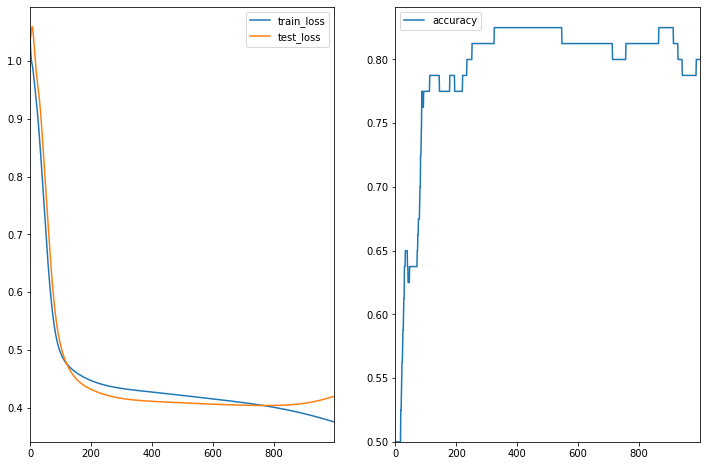

In [146]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)

plt.show()

We plot a confusion matrix for the result

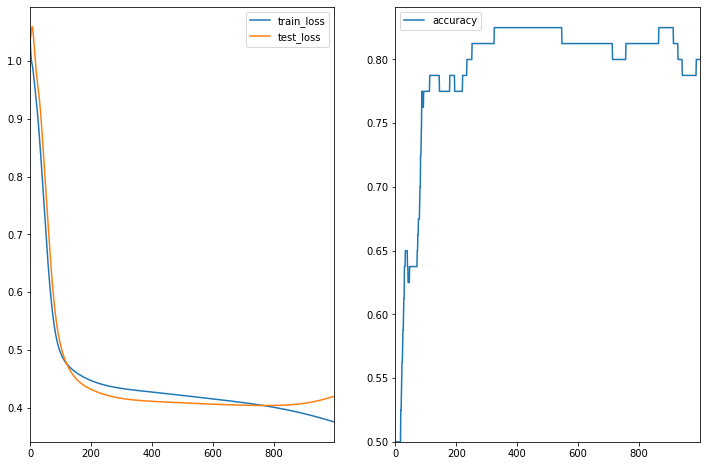

In [147]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)

plt.show()

In [148]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [149]:
_, pred = result_model['_, pred'] 

In [150]:
y_pred = pred.detach().numpy()

In [151]:
Ytest = result_model['actual_test_label'].detach().numpy()

In [152]:
results = confusion_matrix(Ytest, y_pred)

In [158]:
results

array([[12,  7,  0],
       [ 1, 36,  3],
       [ 0,  5, 16]], dtype=int64)

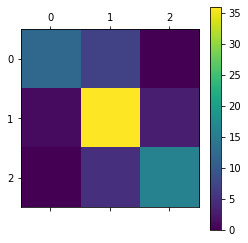

In [157]:
plt.matshow(results)

plt.colorbar()
plt.show()


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

#### the ability of a model to find all the relevant cases within a dataset. The precise definition of recall is the number of true positives divided by the number of true positives plus the number of false negatives. 

In [159]:
recall_score(Ytest, y_pred,average = 'weighted')

0.8

#### precision expresses the proportion of the data points our model says was relevant actually were relevant

In [160]:
precision_score(Ytest, y_pred,average = 'weighted')

0.8152834008097166